# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/wandagustrifa/Bank-Transaction-for-Fraud/refs/heads/main/Bank%20Transaction%20Dataset/bank_transactions_data.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [56]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')


In [57]:
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['TransactionHour'] = df['TransactionDate'].dt.hour

df['DaysSincePrevTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days


In [58]:
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TransactionMonth,TransactionDay,TransactionDayOfWeek,TransactionHour,DaysSincePrevTransaction
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024,2023.005175,6.56250,15.827229,1.448248,16.626194,-487.857882
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23,2023.000000,1.00000,1.000000,0.000000,16.000000,-672.000000
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53,2023.000000,3.00000,8.000000,0.000000,16.000000,-581.000000
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22,2023.000000,7.00000,16.000000,1.000000,16.000000,-486.000000
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872,2023.000000,10.00000,24.000000,3.000000,17.000000,-395.000000
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23,2024.000000,12.00000,31.000000,4.000000,18.000000,-308.000000
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN,0.071766,3.47559,8.761293,1.511310,0.731059,106.378910


In [59]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TransactionMonth,TransactionDay,TransactionDayOfWeek,TransactionHour,DaysSincePrevTransaction
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,...,2512.000000,2512.000000,2512.000000,2512,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000
unique,2512,495,NaN,NaN,2,43,681,592,100,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,...,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024,2023.005175,6.56250,15.827229,1.448248,16.626194,-487.857882
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,1.000000,101.250000,2024-11-04 08:06:23,2023.000000,1.00000,1.000000,0.000000,16.000000,-672.000000
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,...,63.000000,1.000000,1504.370000,2024-11-04 08:07:53,2023.000000,3.00000,8.000000,0.000000,16.000000,-581.000000
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,112.500000,1.000000,4735.510000,2024-11-04 08:09:22,2023.000000,7.00000,16.000000,1.000000,16.000000,-486.000000
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872,2023.000000,10.00000,24.000000,3.000000,17.000000,-395.000000
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,...,300.000000,5.000000,14977.990000,2024-11-04 08:12:23,2024.000000,12.00000,31.000000,4.000000,18.000000,-308.000000


In [60]:
missing_values = df.isnull().sum()
missing_values[missing_values>0]

,0


In [61]:
df.duplicated().sum()


np.int64(0)

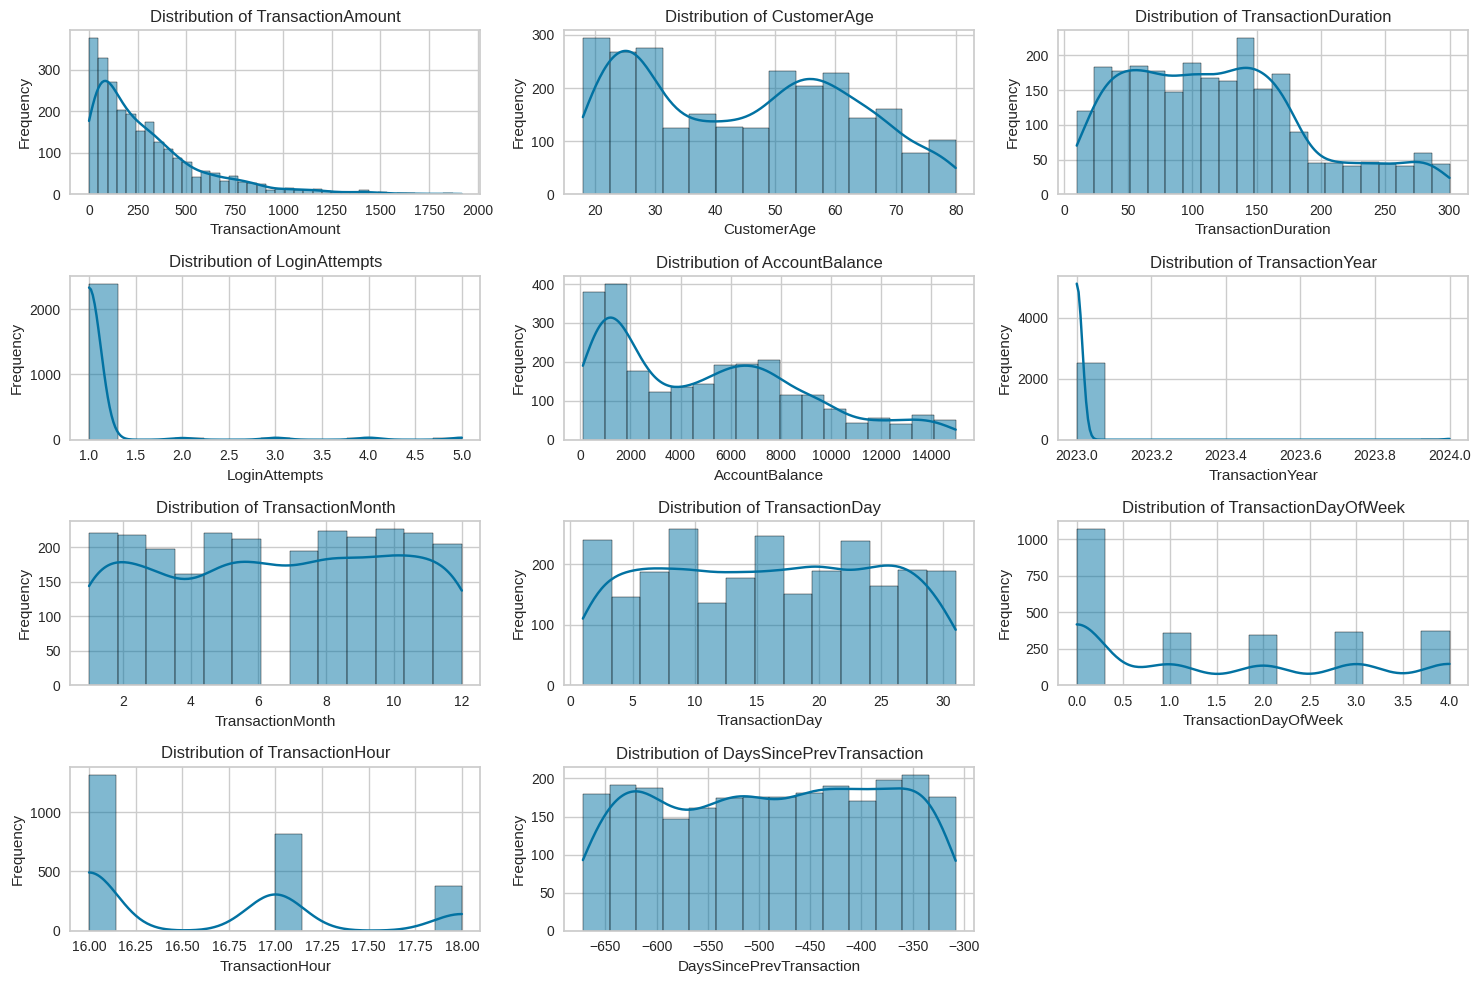

In [62]:
num_features = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
  plt.subplot(4, 3, i+1)
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


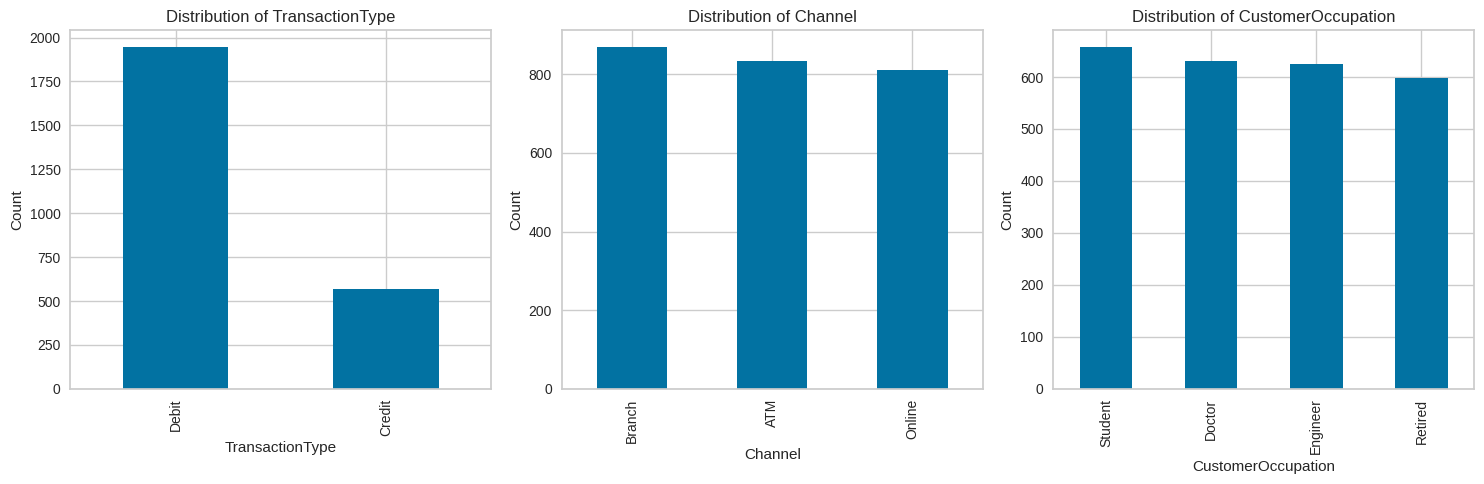

In [63]:
categorical_features = ['TransactionType','Channel','CustomerOccupation']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

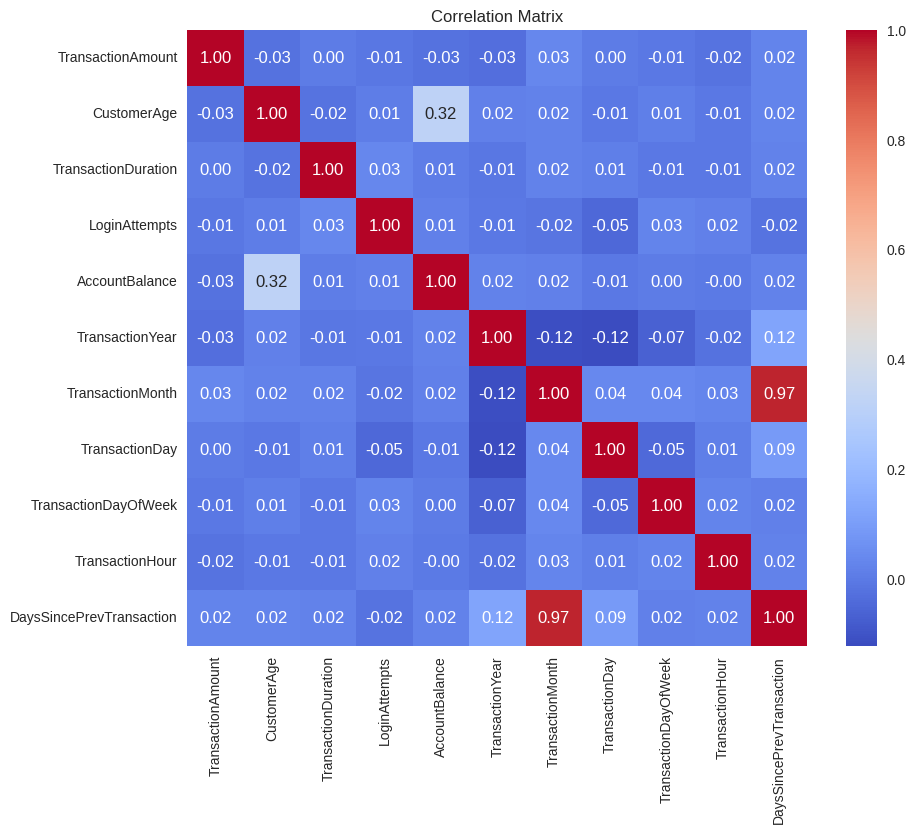

In [64]:
plt.figure(figsize=(10, 8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

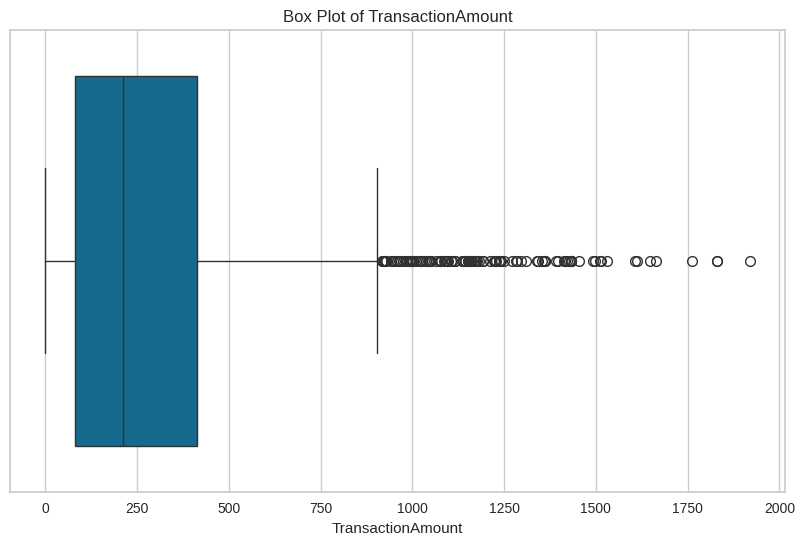

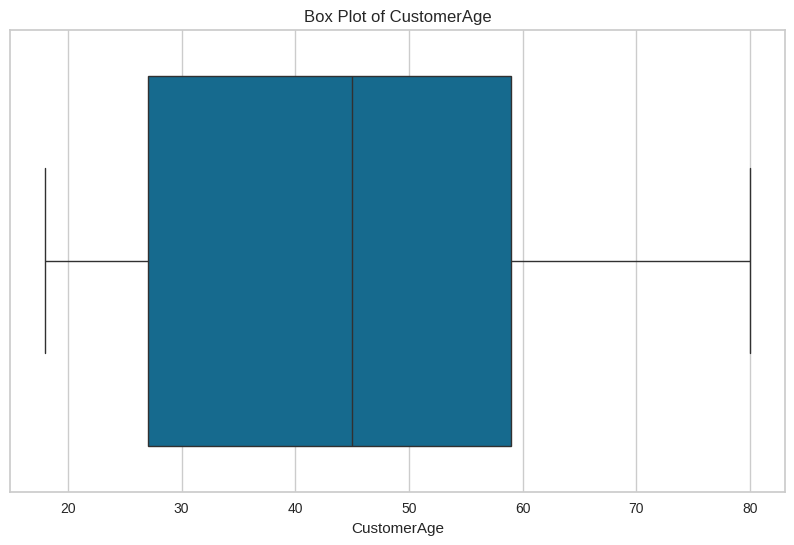

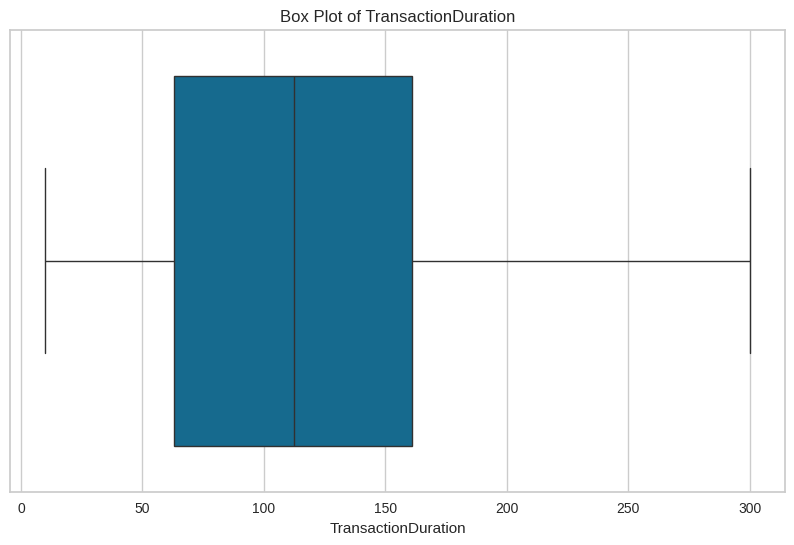

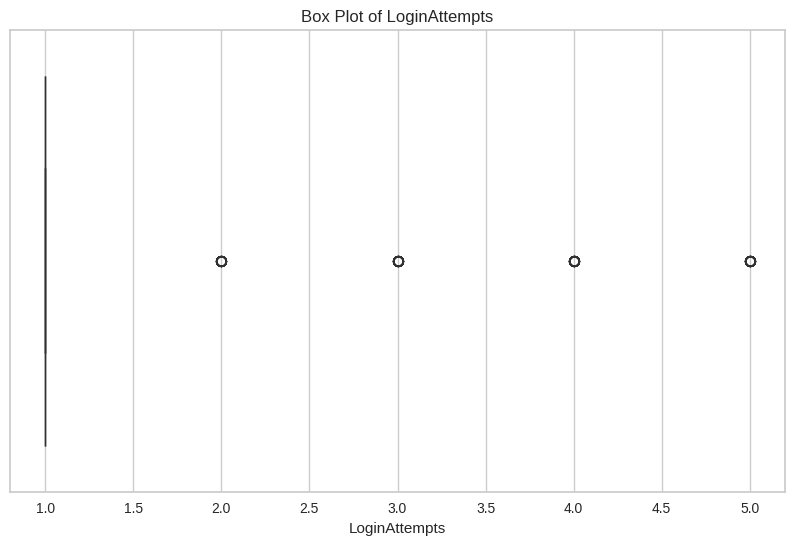

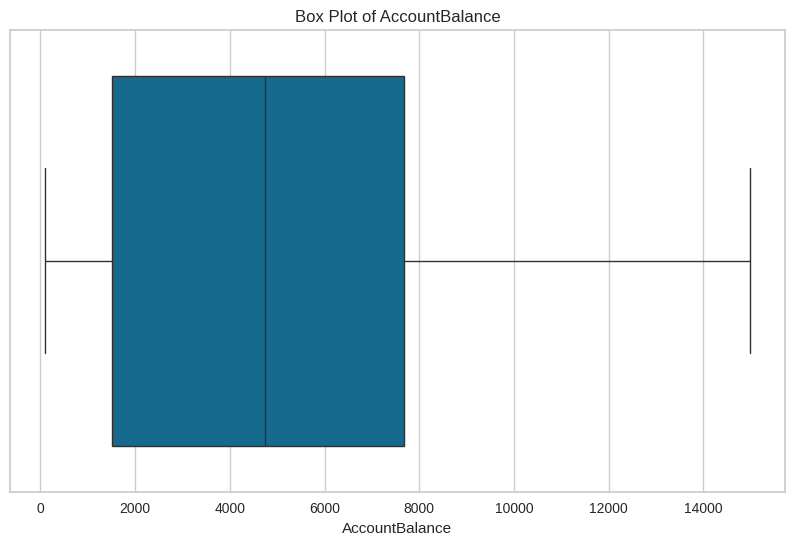

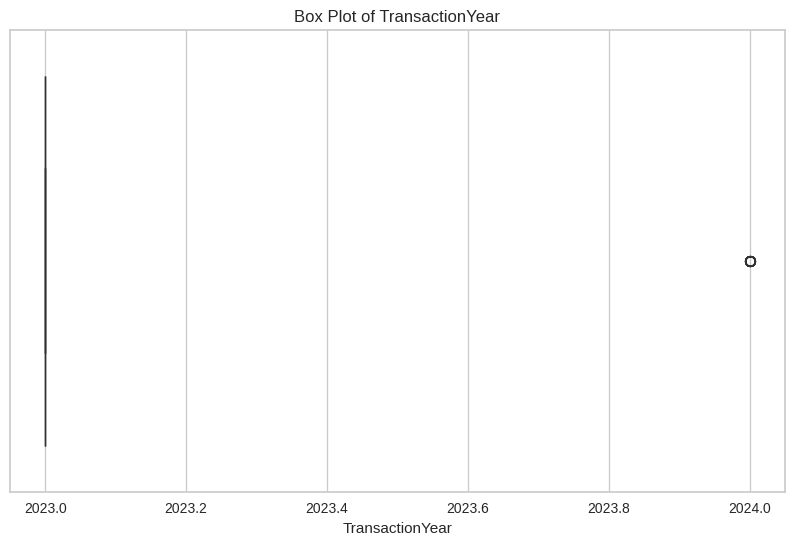

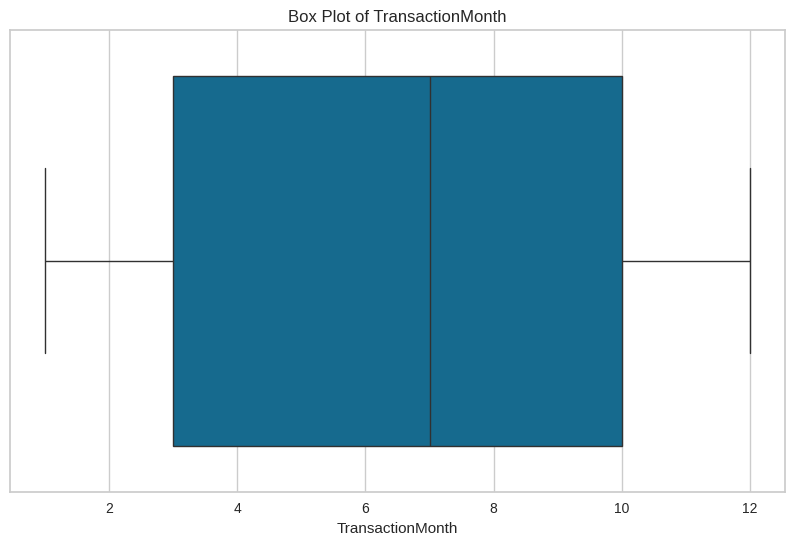

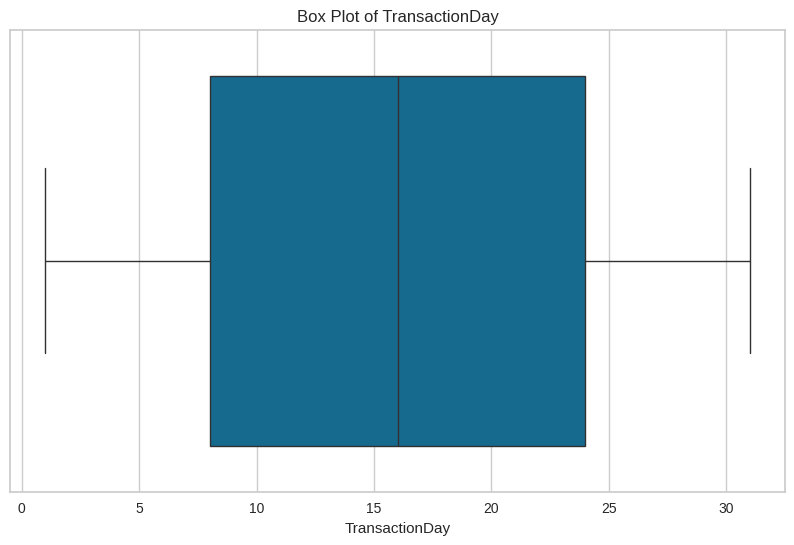

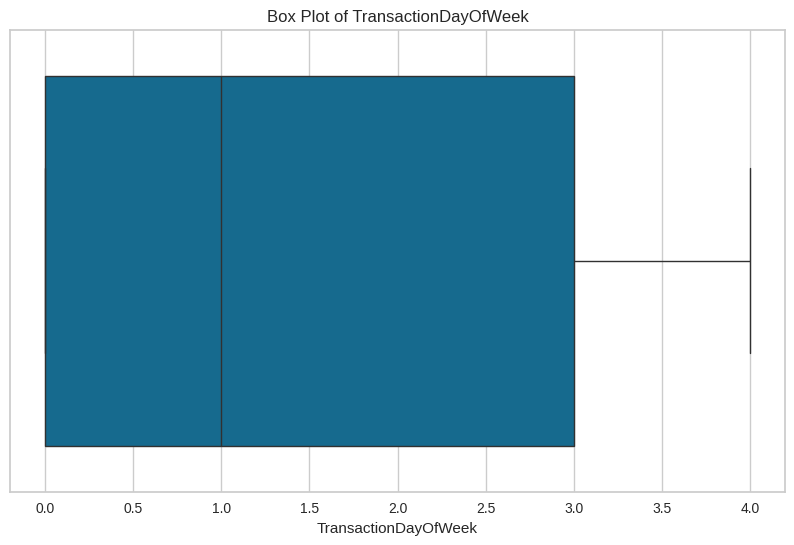

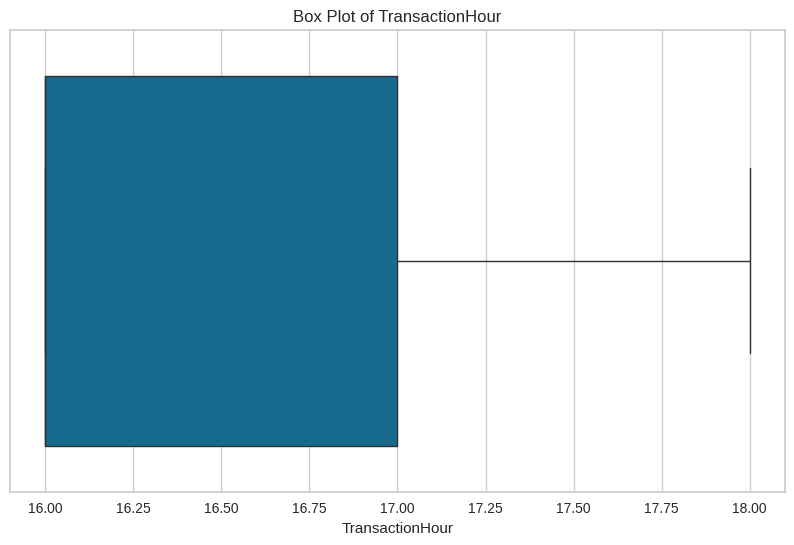

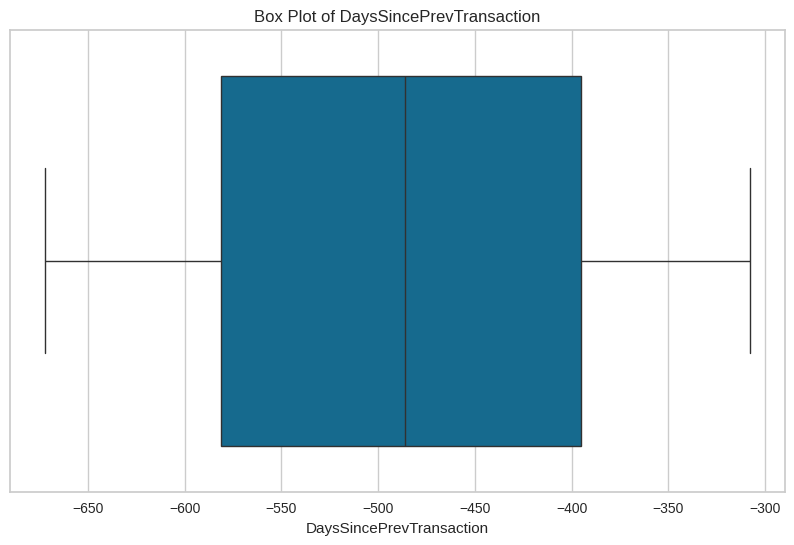

In [65]:
num_features = df.select_dtypes(include=['number']).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [66]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

condition = ~((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_num = df.loc[condition, num_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_num, df.loc[condition, categorical_features]], axis=1)

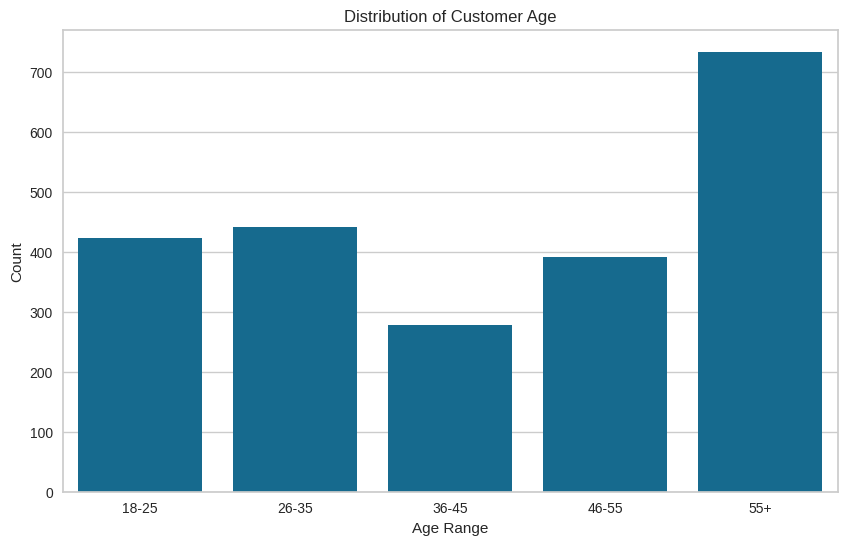

In [67]:
age18_25 = df[(df['CustomerAge'] >= 18) & (df['CustomerAge'] <= 25)]
age26_35 = df[(df['CustomerAge'] >= 26) & (df['CustomerAge'] <= 35)]
age36_45 = df[(df['CustomerAge'] >= 36) & (df['CustomerAge'] <= 45)]
age46_55 = df[(df['CustomerAge'] >= 46) & (df['CustomerAge'] <= 55)]
age55above = df[df['CustomerAge'] >= 56]

x = ['18-25','26-35','36-45','46-55','55+']
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y)
plt.title('Distribution of Customer Age')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

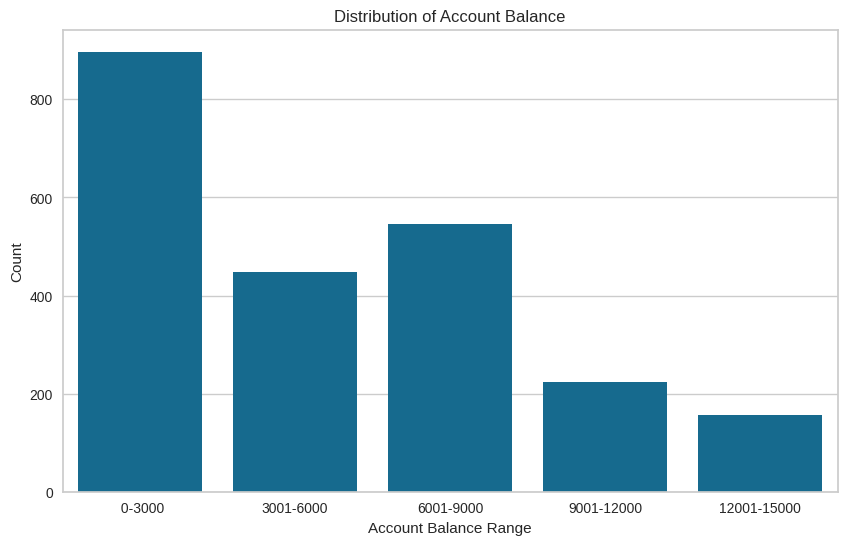

In [68]:
ab0_3000 = df[(df['AccountBalance'] >= 0) & (df['AccountBalance'] <= 3000)]
ab3001_6000 = df[(df['AccountBalance'] >= 3001) & (df['AccountBalance'] <= 6000)]
ab6001_9000 = df[(df['AccountBalance'] >= 6001) & (df['AccountBalance'] <= 9000)]
ab9001_12000 = df[(df['AccountBalance'] >= 9001) & (df['AccountBalance'] <= 12000)]
ab12001_15000 = df[(df['AccountBalance'] >= 12001) & (df['AccountBalance'] <= 15000)]

x=[' 0-3000','3001-6000','6001-9000','9001-12000','12001-15000']
y = [len(ab0_3000.index),len(ab3001_6000.index),len(ab6001_9000.index),len(ab9001_12000.index),len(ab12001_15000.index)]

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y)
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance Range')
plt.ylabel('Count')
plt.show()

In [69]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,TransactionID,AccountID,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation
0,TX000001,AC00128,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor
1,TX000002,AC00455,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor
2,TX000003,AC00019,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student
3,TX000004,AC00070,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student
4,TX000005,AC00411,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student
...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor
2508,TX002509,AC00322,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor
2509,TX002510,AC00095,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired
2510,TX002511,AC00118,Debit,Denver,D000634,21.190.11.223,M041,Online,Student


In [70]:
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TransactionMonth,TransactionDay,TransactionDayOfWeek,TransactionHour,DaysSincePrevTransaction,TransactionID,AccountID,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation
0,14.09,70,81,1,5112.21,2023,4,11,1,16,-573,0,126,1,36,364,185,14,0,0
1,376.24,68,141,1,13758.91,2023,6,27,1,16,-496,1,449,1,15,50,81,51,0,0
2,126.29,19,56,1,1122.35,2023,7,10,0,18,-483,2,18,1,23,229,342,8,2,3
3,184.50,26,25,1,8569.06,2023,5,5,4,16,-549,3,68,1,33,182,299,1,2,3
4,13.45,26,198,1,7429.40,2023,10,16,0,17,-385,4,405,0,1,297,499,90,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33,109,1,12690.79,2023,4,26,2,17,-558,2265,292,0,7,600,324,71,1,0
2508,251.54,48,177,1,254.75,2023,3,22,2,17,-593,2266,317,1,40,393,446,28,1,0
2509,28.63,56,146,1,3382.91,2023,8,21,0,17,-441,2267,93,1,36,93,472,86,1,2
2510,185.97,23,19,1,1776.91,2023,2,24,4,16,-619,2268,116,1,10,609,325,40,2,3


In [71]:
df_lencoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2270 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionAmount         2270 non-null   float64
 1   CustomerAge               2270 non-null   int64  
 2   TransactionDuration       2270 non-null   int64  
 3   LoginAttempts             2270 non-null   int64  
 4   AccountBalance            2270 non-null   float64
 5   TransactionYear           2270 non-null   int32  
 6   TransactionMonth          2270 non-null   int32  
 7   TransactionDay            2270 non-null   int32  
 8   TransactionDayOfWeek      2270 non-null   int32  
 9   TransactionHour           2270 non-null   int32  
 10  DaysSincePrevTransaction  2270 non-null   int64  
 11  TransactionID             2270 non-null   int64  
 12  AccountID                 2270 non-null   int64  
 13  TransactionType           2270 non-null   int64  
 14  Location     

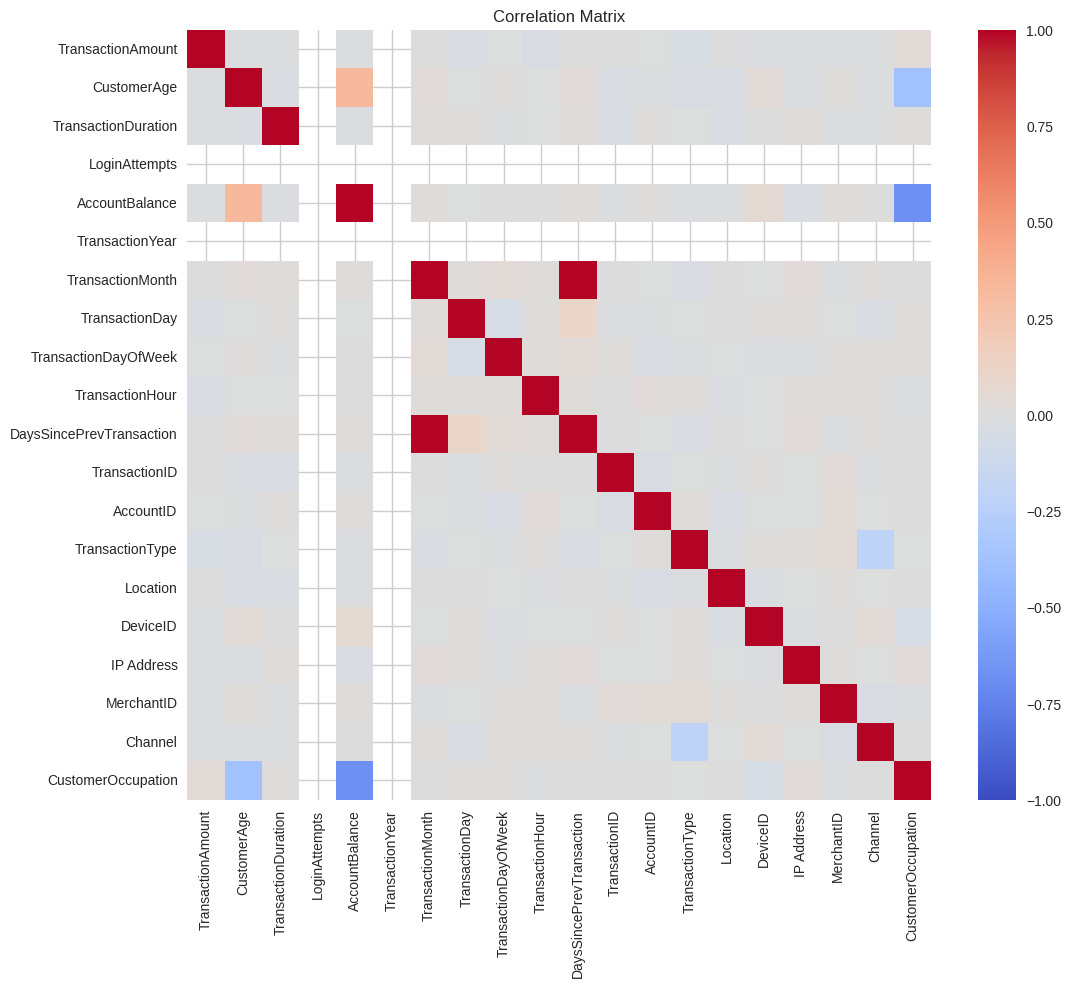

In [72]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [73]:
features = ['AccountBalance', 'CustomerAge', 'TransactionAmount',
            'TransactionType', 'Channel']

# Scaling features
X = df_lencoder[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

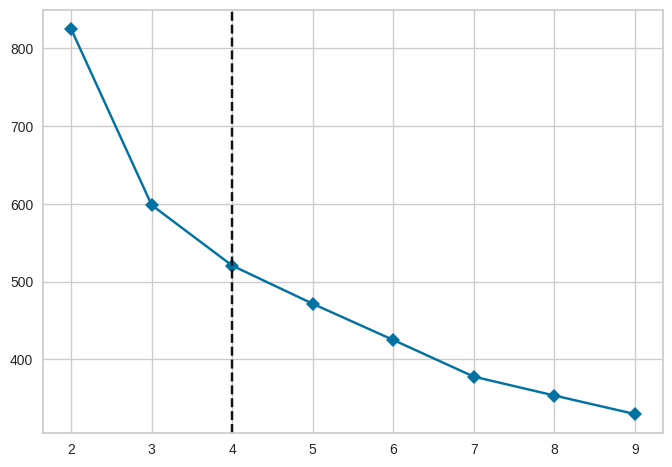

In [74]:
# Finding the optimal number of clusters
elbow_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='distortion', timings=False)
elbow_visualizer.fit(X_scaled)
k_optimal = elbow_visualizer.elbow_value_

In [75]:
# Clustering without feature selection
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df_lencoder['Cluster'] = kmeans.labels_
score_no_selection = silhouette_score(X_scaled, kmeans.labels_)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [76]:
print(f"Silhouette Score without Feature Selection: {score_no_selection}")

Silhouette Score without Feature Selection: 0.30141793277715073


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [77]:
# Feature selection
X_selected = SelectKBest(mutual_info_classif, k=3).fit_transform(X_scaled, df_lencoder['Cluster'])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Clustering with feature selection
kmeans_selected = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_selected.fit(X_pca)
df_lencoder['Cluster_Selected'] = kmeans_selected.labels_
score_with_selection = silhouette_score(X_pca, kmeans_selected.labels_)


print(f"Silhouette Score with Feature Selection: {score_with_selection}")

Silhouette Score with Feature Selection: 0.8711080601375931


In [78]:
print(f"Silhouette Score without Feature Selection: {score_no_selection}")
print(f"Silhouette Score with Feature Selection: {score_with_selection}")

Silhouette Score without Feature Selection: 0.30141793277715073
Silhouette Score with Feature Selection: 0.8711080601375931


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

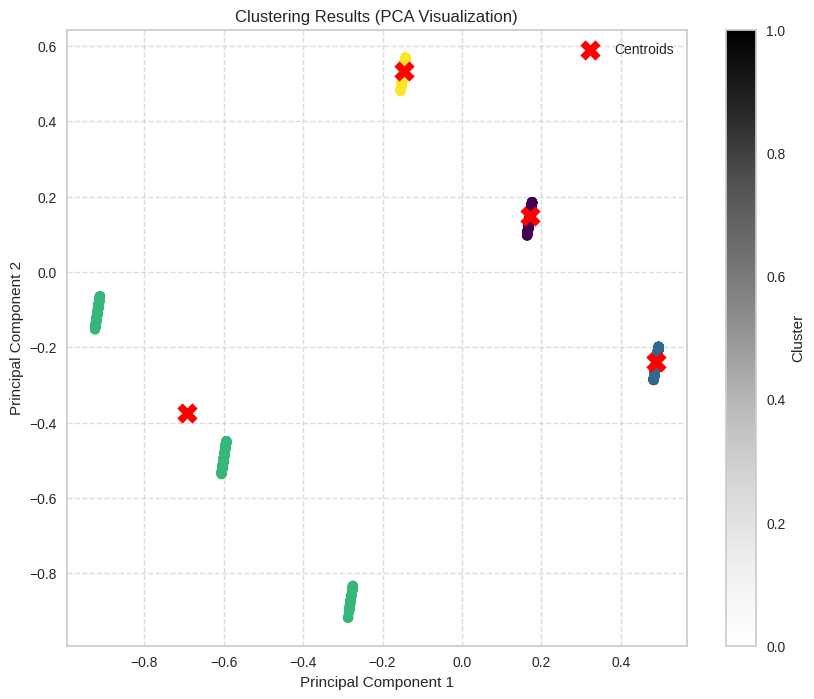

In [79]:
# Visualisasi hasil Clustering
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_selected.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans_selected.cluster_centers_[:, 0], kmeans_selected.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustering Results (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [81]:
df['Cluster'] = kmeans_selected.labels_

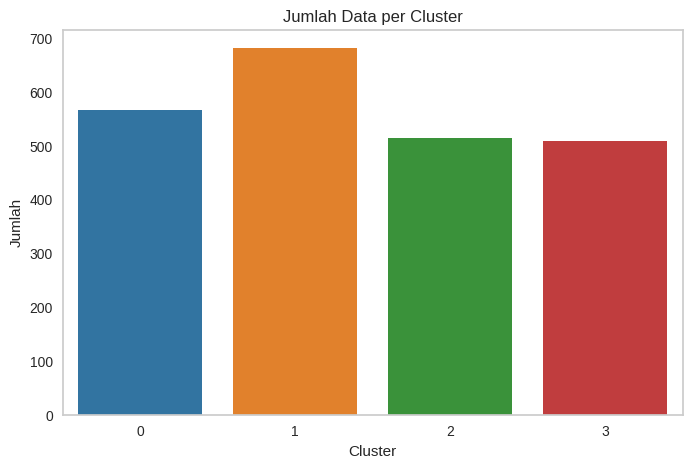

In [82]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='tab10')
plt.title('Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.show()

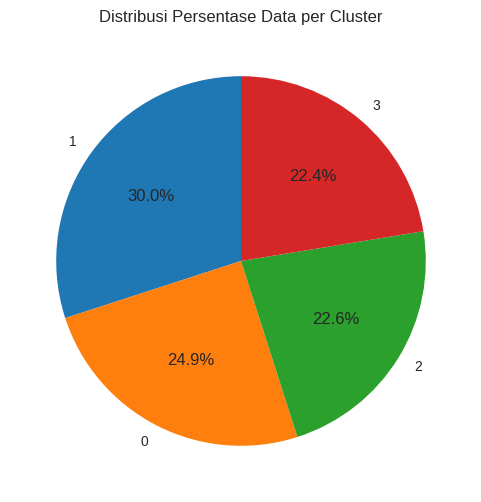

In [83]:
plt.figure(figsize=(6, 6))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('tab10'), startangle=90)
plt.ylabel('')
plt.title('Distribusi Persentase Data per Cluster')
plt.show()



=== Detailed Cluster Analysis ===


<Figure size 1200x600 with 0 Axes>

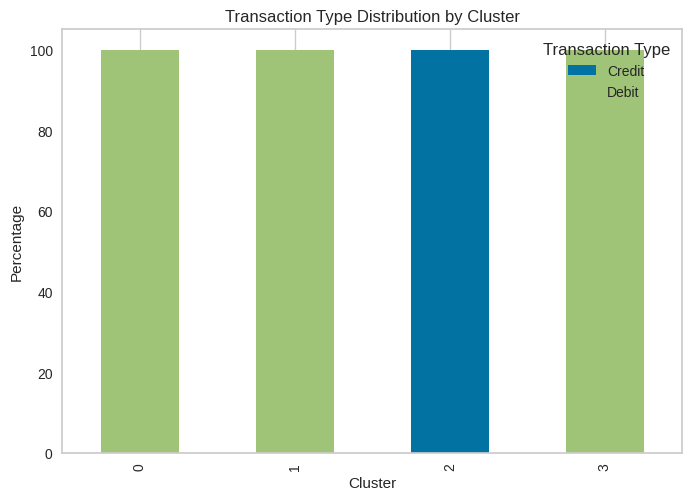

In [84]:
print("\n=== Detailed Cluster Analysis ===")
# Analisis transaction type distribution berdasarkan cluster
plt.figure(figsize=(12, 6))
transaction_type_by_cluster = pd.crosstab(df['Cluster'], df['TransactionType'], normalize='index') * 100
transaction_type_by_cluster.plot(kind='bar', stacked=True)
plt.title('Transaction Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Transaction Type')
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

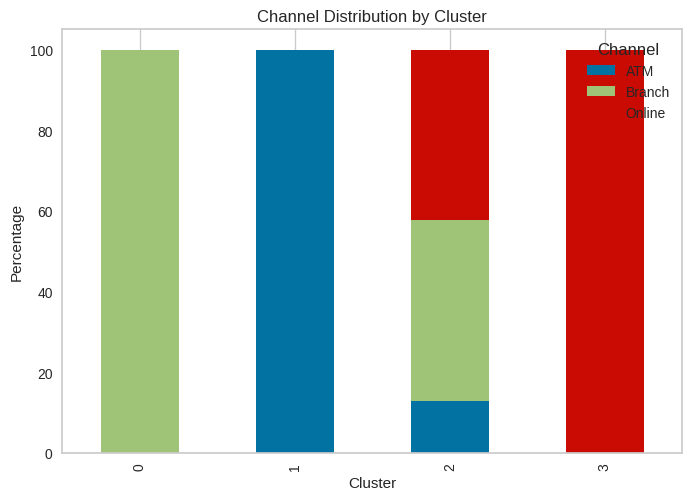

In [85]:
# Analisis channel distribution berdasarkan cluster
plt.figure(figsize=(12, 6))
channel_by_cluster = pd.crosstab(df['Cluster'], df['Channel'], normalize='index') * 100
channel_by_cluster.plot(kind='bar', stacked=True)
plt.title('Channel Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Channel')
plt.grid(axis='y')
plt.show()

<Figure size 1500x800 with 0 Axes>

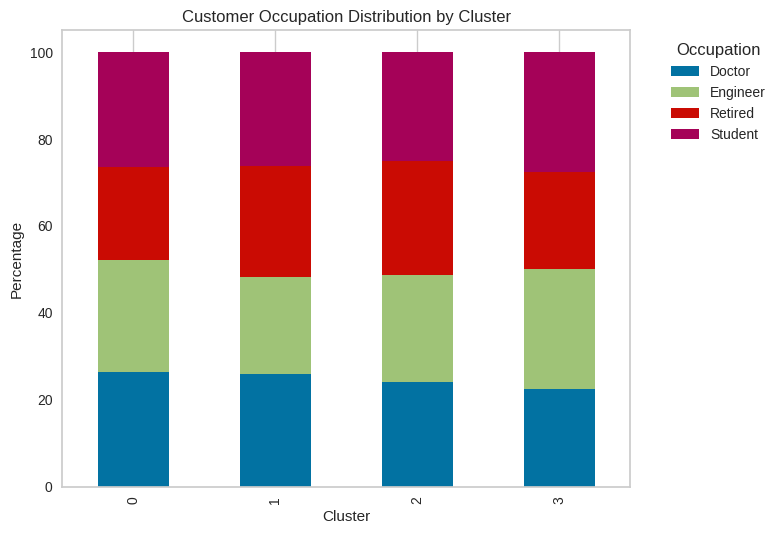

In [86]:
# Analisis customer occupation distribution berdasarkan cluster
plt.figure(figsize=(15, 8))
occupation_by_cluster = pd.crosstab(df['Cluster'], df['CustomerOccupation'], normalize='index') * 100
occupation_by_cluster.plot(kind='bar', stacked=True)
plt.title('Customer Occupation Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

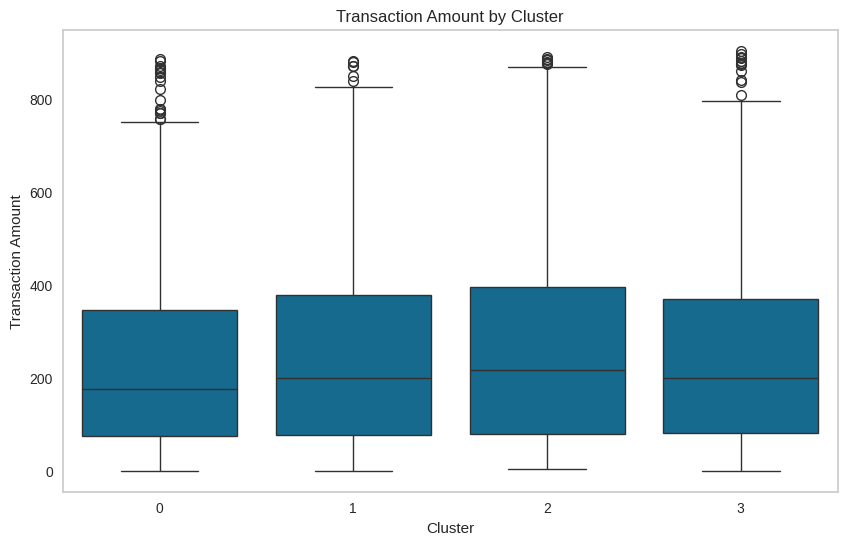

In [87]:
# CMembandingkan transaction amounts by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Transaction Amount')
plt.grid(axis='y')
plt.show()

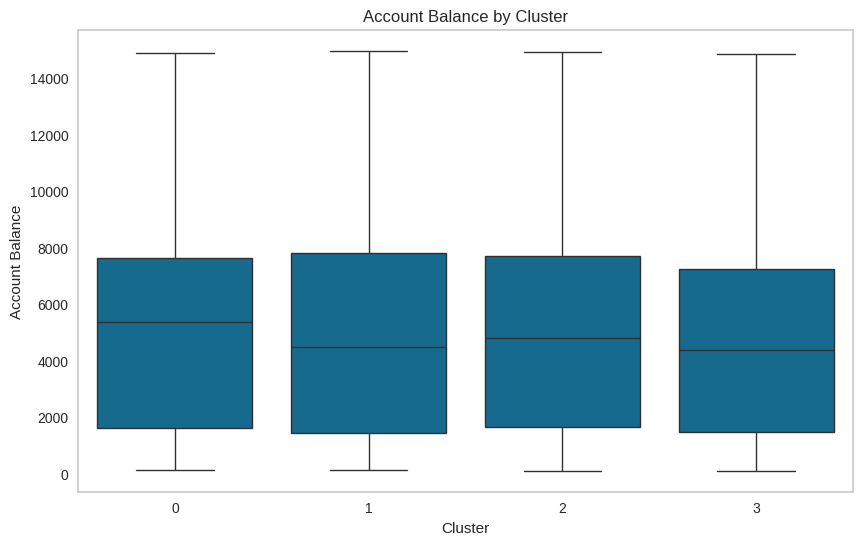

In [88]:
# Membandingkan account balance by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='AccountBalance', data=df)
plt.title('Account Balance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Account Balance')
plt.grid(axis='y')
plt.show()

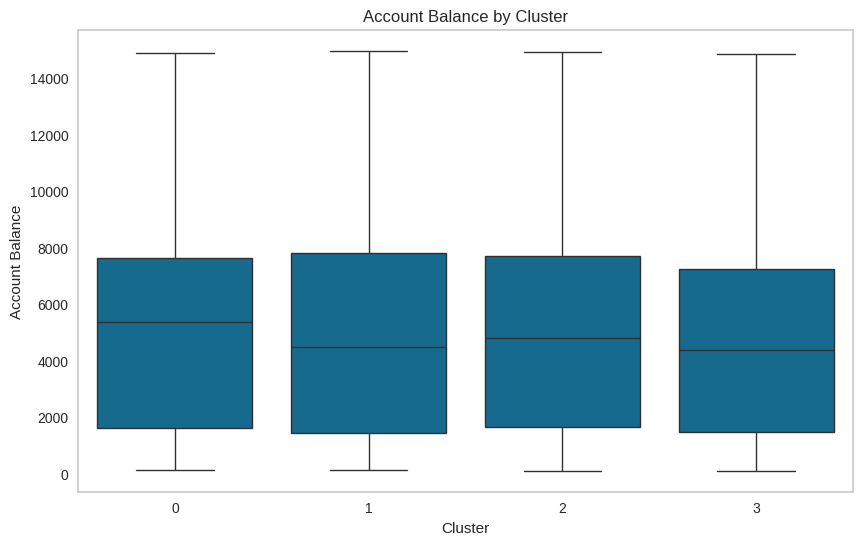

In [89]:
# Membandingkan account balance by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='AccountBalance', data=df)
plt.title('Account Balance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Account Balance')
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

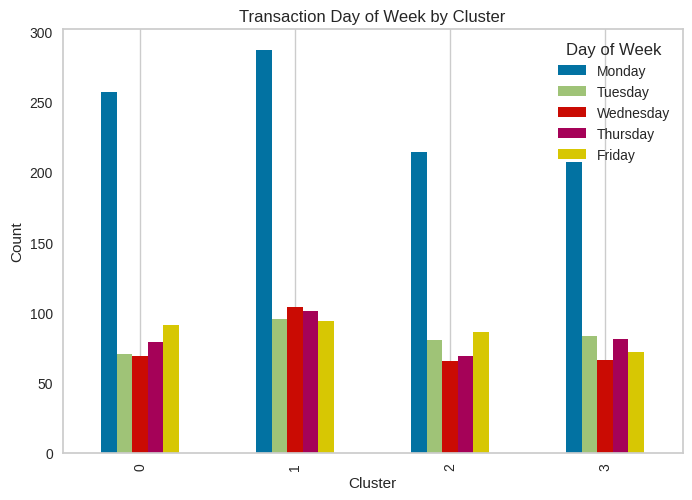

In [90]:
# Transaction behaviors on different days of week
plt.figure(figsize=(12, 6))
day_of_week_by_cluster = pd.crosstab(df['Cluster'], df['TransactionDayOfWeek'])
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_of_week_by_cluster.columns = [day_of_week_mapping[day] for day in day_of_week_by_cluster.columns]
day_of_week_by_cluster.plot(kind='bar')
plt.title('Transaction Day of Week by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Day of Week')
plt.grid(axis='y')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [91]:
df['Cluster'] = kmeans_selected.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [92]:
inverse_mappings = {}
categorical_features = ['TransactionType', 'CustomerOccupation', 'Channel', 'Location']

for feature in categorical_features:
    unique_values = df[feature].unique()
    encoded_values = [label_encoder.fit_transform([val])[0] for val in unique_values]
    inverse_mappings[feature] = dict(zip(encoded_values, unique_values))

In [93]:
numerical_features = ['AccountBalance', 'CustomerAge', 'TransactionAmount', 'TransactionDuration', 'LoginAttempts']
cluster_numerical_stats = df.groupby('Cluster')[numerical_features].agg(['min', 'max', 'mean'])
cluster_categorical_modes = {}
for feature in categorical_features:
    cluster_categorical_modes[feature] = df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])



Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [94]:
print("Cluster Numerical Statistics:")
print(cluster_numerical_stats)
print("\nCluster Categorical Modes:")
for feature, modes in cluster_categorical_modes.items():
    print(f"\n{feature} Modes by Cluster:")
    for cluster, mode in modes.items():
        print(f"Cluster {cluster}: {mode}")

Cluster Numerical Statistics:
        AccountBalance                        CustomerAge                 \
                   min       max         mean         min max       mean   
Cluster                                                                    
0               117.98  14904.90  5312.442261          18  80  43.782686   
1               112.76  14977.99  5070.222805          18  80  45.336270   
2               105.01  14935.50  5226.942374          18  80  45.789883   
3               101.25  14852.42  4836.670963          18  80  43.585462   

        TransactionAmount                     TransactionDuration       \
                      min     max        mean                 min  max   
Cluster                                                                  
0                    0.45  886.19  238.401767                  10  298   
1                    0.32  880.04  256.284934                  11  300   
2                    3.30  890.24  274.392938                  10  

In [95]:
df_original = df.copy()
cluster_profiles = []

for cluster_id in range(k_optimal):
    cluster_data = df[df['Cluster'] == cluster_id]
    numerical_stats = cluster_data[numerical_features].agg(['mean', 'min', 'max']).to_dict()
    categorical_modes = {feature: cluster_data[feature].mode().iloc[0] for feature in categorical_features}
    profile = {
        'cluster_id': cluster_id,
        'size': len(cluster_data),
        'percentage': (len(cluster_data) / len(df)) * 100,
        'numerical_stats': numerical_stats,
        'categorical_modes': categorical_modes
    }

    cluster_profiles.append(profile)

for profile in cluster_profiles:
    print(f"\n--- Cluster {profile['cluster_id']} ---")
    print(f"Size: {profile['size']} customers ({profile['percentage']:.2f}% of total)")

    print("\nNumerical Features:")
    for feature, stats in profile['numerical_stats'].items():
        print(f"  {feature}:")
        for stat_name, value in stats.items():
            print(f"    {stat_name}: {value:.2f}")

    print("\nCategorical Features:")
    for feature, mode in profile['categorical_modes'].items():
        print(f"  {feature}: {mode}")



--- Cluster 0 ---
Size: 566 customers (24.93% of total)

Numerical Features:
  AccountBalance:
    mean: 5312.44
    min: 117.98
    max: 14904.90
  CustomerAge:
    mean: 43.78
    min: 18.00
    max: 80.00
  TransactionAmount:
    mean: 238.40
    min: 0.45
    max: 886.19
  TransactionDuration:
    mean: 115.02
    min: 10.00
    max: 298.00
  LoginAttempts:
    mean: 1.00
    min: 1.00
    max: 1.00

Categorical Features:
  TransactionType: Debit
  CustomerOccupation: Student
  Channel: Branch
  Location: Tucson

--- Cluster 1 ---
Size: 681 customers (30.00% of total)

Numerical Features:
  AccountBalance:
    mean: 5070.22
    min: 112.76
    max: 14977.99
  CustomerAge:
    mean: 45.34
    min: 18.00
    max: 80.00
  TransactionAmount:
    mean: 256.28
    min: 0.32
    max: 880.04
  TransactionDuration:
    mean: 121.81
    min: 11.00
    max: 300.00
  LoginAttempts:
    mean: 1.00
    min: 1.00
    max: 1.00

Categorical Features:
  TransactionType: Debit
  CustomerOccupation:

## Cluster 0:
- Demographic: Mayoritas adalah *student* dengan rata-rata usia 43,8 tahun
- Behavior: Lebih sering menggunakan layanan cabang untuk transaksi debit
- Transaction: Rata-rata nilai transaksi sebesar $238,40
- Financial: Rata-rata account balance/saldo rekening sebesar $5.312,44
- Location preference: Didominasi oleh wilayah Tucson
- Analysis: Cluster ini mewakili pengguna konservatif yang berbasis di cabang dan lebih menyukai layanan perbankan tradisional.

## Cluster 1:
- Demographic: Student dengan rata-rata usia sedikit lebih tinggi, yaitu 45,3 tahun
- Behavior: Utamanya menggunakan layanan ATM untuk transaksi debit
- Transaction:Rata-rata nilai transaksi sebesar $256,28
- Financial: Rata-rata saldo rekening sebesar $5.070,22
- Location preference: Didominasi oleh wilayah Omaha
- Analysis: Cluster ini mewakili pengguna yang berfokus pada ATM dan kemungkinan besar menghargai kenyamanan untuk kebutuhan perbankan dasar.

## Cluster 2:
- Demographic: Mayoritas adalah individu yang sudah pensiun/*retired* dengan rata-rata usia 45,8 tahun
- Behavior: Lebih sering menggunakan layanan cabang untuk transaksi kredit
- Transaction: Memiliki rata-rata nilai transaksi tertinggi sebesar $274,39
- Financial:  Rata-rata saldo rekening sebesar $5.226,94
- Location preference: Didominasi oleh wilayah Austin
- Analysis: Cluster ini mewakili pengguna perbankan tradisional yang lebih menyukai transaksi kredit dan memiliki pola pengeluaran yang lebih tinggi.

## Cluster 3:
- Demographic: Engineers dengan rata-rata usia 43,6 tahun
- Behavior: Lebih memilih perbankan online untuk transaksi debit
- Transaction: Rata-rata nilai transaksi sebesar $256,58
- Financial: Memiliki rata-rata saldo rekening terendah sebesar $4.836,67
- Location preference: Didominasi oleh wilayah Chicago
- Analysis: Cluster ini mewakili pelanggan yang melek teknologi dan lebih memilih solusi perbankan digital.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [96]:
# Export results to CSV
df_with_clusters = df.copy()
df_with_clusters['ClusterLabel'] = df_with_clusters['Cluster'].apply(
    lambda x: f"Cluster {x}"
)

# Add cluster descriptions
cluster_descriptions = {
    0: "Branch-Based Debit Users",
    1: "ATM-Focused Debit Users",
    2: "Branch-Based Credit Users",
    3: "Online Banking Users"
}
df_with_clusters['ClusterDescription'] = df_with_clusters['Cluster'].map(cluster_descriptions)

# Export to CSV
df_with_clusters.to_csv('bank_transactions_with_clusters.csv', index=False)
print("\nData with cluster assignments exported to 'bank_transactions_with_clusters.csv'")

# Create a customer segmentation summary
segment_summary = pd.DataFrame({
    'Cluster': range(k_optimal),
    'Size': [profile['size'] for profile in cluster_profiles],
    'Percentage': [profile['percentage'] for profile in cluster_profiles],
    'AvgAge': [profile['numerical_stats']['CustomerAge']['mean'] for profile in cluster_profiles],
    'AvgBalance': [profile['numerical_stats']['AccountBalance']['mean'] for profile in cluster_profiles],
    'AvgTransactionAmount': [profile['numerical_stats']['TransactionAmount']['mean'] for profile in cluster_profiles],
    'PrimaryOccupation': [profile['categorical_modes']['CustomerOccupation'] for profile in cluster_profiles],
    'PrimaryChannel': [profile['categorical_modes']['Channel'] for profile in cluster_profiles],
    'PrimaryTransactionType': [profile['categorical_modes']['TransactionType'] for profile in cluster_profiles],
    'PrimaryLocation': [profile['categorical_modes']['Location'] for profile in cluster_profiles],
    'Description': [cluster_descriptions[i] for i in range(k_optimal)]
})

# Export summary to CSV
segment_summary.to_csv('customer_segment_summary.csv', index=False)
print("Customer segment summary exported to 'customer_segment_summary.csv'")



Data with cluster assignments exported to 'bank_transactions_with_clusters.csv'
Customer segment summary exported to 'customer_segment_summary.csv'
